# Part I - Ford GoBike System Data Exploration
## by Mary Etokwudo

# Table of contents

1. [Introduction](#introduction)

2. [Preliminary Wrangling](#wrangling)

3. [Univariate Exploration](#univariate)

4. [Bivariate Exploration](#bivariate)

5. [Multivariate Exploration](#multivariate)

6. [Conclusions](#conclusions)


## Introduction <a name="introduction"></a>
This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

We will be analysing the dataset to see how different features change over time, accross various rides and to see if there are relationships between them. We start with preliminary wrangling and move on to univariate, bivariate and then multivariate exploration. Then we summarise our findings.

## Preliminary Wrangling <a name="wrangling"></a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

Let's load our dataset and start withh a non-visual analysis to see if we need to do some cleaning or tidying.

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


Looking at the data types and checking for null/missing values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

We do not have missing data for some of the features but we do for some like the station_id. Since we have complete data for the station longitude and latitude, we can get the missing station ids and the station names by finding matching longitudes and latitudes of those non-null values (This will be necessary if we need them for our analysis).

We will also get the descriptive statistics of the numeric features.

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


There is an inconsistency in the statistical data of the duration feature. This may be due to wrong data that we can drop. We can also calculate the correct duration by subtracting the start_time from end_time and comparing the result with what we have in the duration_sec column.

### Data Cleaning
We identify some dirty and untidy data issues as below:
1. start_station_id and end_station_id are float (should be int)
2. member_birth_year is float (should be int)
3. Missing data
4. data type for date
5. The max duration_sec is unexpectedly way above the 75th percentile (also compared to other percentiles).

We will be creating copies of our data as we clean it, so we can save the versions as we go

In [6]:
df_copy = df.copy()

First, we convert the `start_time` and `end_time` to pandas datetime

In [7]:
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

We are missing `start_station_id` and `end_station_id` for 197 rows. Let's see if we can get stations with same longititude and latitude, with station ids.

In [8]:
null_stations = df_copy[df_copy.start_station_id.isna()]
null_stations

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.544,2019-02-02 12:27:12.267,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.969,2019-02-01 13:04:55.426,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.675,2019-02-01 12:28:37.014,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.147,2019-02-01 12:07:28.940,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


We will pick the latitudes  and see if we can get the station ids from other rides

In [9]:
df_copy[df_copy.start_station_latitude == 37.39]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
45410,605,2019-02-22 12:16:01.730,2019-02-22 12:26:07.725,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4207,Subscriber,1986.0,Male,No
54603,532,2019-02-21 12:25:53.670,2019-02-21 12:34:46.367,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4207,Subscriber,1986.0,Male,No
55542,235,2019-02-21 10:02:11.532,2019-02-21 10:06:07.131,NaN,NaN,37.39,-121.93,NaN,NaN,37.39,-121.93,4249,Subscriber,1994.0,Male,Yes
61593,768,2019-02-20 17:30:56.074,2019-02-20 17:43:45.070,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4207,Subscriber,1986.0,Male,No
71838,743,2019-02-19 17:05:20.891,2019-02-19 17:17:44.592,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4207,Subscriber,1986.0,Male,No
72916,1741,2019-02-19 15:01:18.291,2019-02-19 15:30:19.691,NaN,NaN,37.39,-121.92,NaN,NaN,37.40,-121.94,4197,Customer,1985.0,Female,No
73793,510,2019-02-19 12:33:35.392,2019-02-19 12:42:06.189,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4207,Subscriber,1986.0,Male,No
79523,712,2019-02-18 17:22:03.999,2019-02-18 17:33:56.667,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4197,Subscriber,1986.0,Male,No
81568,546,2019-02-18 12:48:09.383,2019-02-18 12:57:16.319,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.93,4197,Subscriber,1986.0,Male,No


It looks like they are all null values. Since we do not have a station id of zero, we can fill the missing values with zero.
We also need to convert the datatype to integer.

In [10]:
df_copy.fillna({'start_station_id': 0, 'end_station_id':0}, inplace=True)

In [11]:
df_copy['start_station_id'] = df_copy['start_station_id'].astype('int')

In [12]:
df_copy['end_station_id'] = df_copy['end_station_id'].astype('int')

For the `member_birth_year`, let fill the missing values with the mean member_birth_year value (we can fill with zero because that will be unreal and will distort our analysis). Then we convert the datatype to integer.

In [13]:
mean_birth_year = df_copy.member_birth_year.mean()
mean_birth_year

1984.8064368787361

In [14]:
df_copy.fillna({'member_birth_year': mean_birth_year}, inplace=True)

In [15]:
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype('int')

For `member_gender`, we will fill the missing values with "Other". Then we fill missing values for `start_station_name` and `end_station_name` with "None".

In [16]:
df_copy["member_gender"].fillna("Other", inplace = True)

In [17]:
df_copy["start_station_name"].fillna("None", inplace = True)
df_copy["end_station_name"].fillna("None", inplace = True)

We will check if the `duration_sec` column has the correct values, by subtracting `start_time` from `end_time` and comparing the value with what we have in the `duration_sec` column.

In [18]:
df_copy['duration2'] = (df_copy['end_time'] - df_copy['start_time']).dt.total_seconds().astype('int')

In [19]:
df_copy['equal'] = np.where(df_copy["duration_sec"] == df_copy["duration2"], True, False)

In [20]:
df_copy.loc[df_copy['equal']==False].shape

(0, 18)

Since we do not have any wrong duration_sec, we will not be updating it. Rather, we would drop the new columns we created.

In [21]:
df_copy.drop(['duration2', 'equal'], axis=1, inplace=True) 

Let's add some new columns 'start_year', 'start_month', 'start_day', 'age' so we can do some analysis based on them. We also want to calculate age based on the year the ride was taken. This way, we can know the age of the rider at that time.

In [22]:
df_copy2 = df_copy.copy()

In [23]:
df_copy2["year"] = df_copy2["start_time"].dt.year
df_copy2["month"] = df_copy2["start_time"].dt.month
df_copy2["week_day"] = df_copy2["start_time"].dt.day_name()

In [24]:
df_copy2["age"] = df_copy2["year"] - df_copy2["member_birth_year"]
df_copy2

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,week_day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,2019,2,Thursday,35
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,1984,Other,No,2019,2,Thursday,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,2019,2,Thursday,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,2019,2,Thursday,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,2019,2,Thursday,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996,Male,No,2019,2,Friday,23
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984,Male,No,2019,2,Friday,35
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990,Male,Yes,2019,2,Friday,29
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988,Male,No,2019,2,Friday,31


In [25]:
df_copy2.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,year,month,age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000,183412.0,183412.0,183412.000000
mean,726.078435,138.441569,37.771223,-122.352664,136.102780,37.771427,-122.352250,4472.906375,1984.770097,2019.0,2.0,34.229903
std,1794.389780,111.811012,0.099581,0.117097,111.544544,0.099490,0.116673,1664.383394,9.887534,0.0,0.0,9.887534
min,61.000000,0.000000,37.317298,-122.453704,0.000000,37.317298,-122.453704,11.000000,1878.000000,2019.0,2.0,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1981.000000,2019.0,2.0,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,2019.0,2.0,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,2019.0,2.0,38.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2019.0,2.0,141.000000


Let's create the age_group column but we will create a copy of our current dataset to preserve the cleaning we've done so far.

In [26]:
df_copy3 = df_copy2.copy()

In [27]:
bins= [13,25,45,65,85]
labels = ['13-24','25-44', '45-64', '65-84']
df_copy3['age_group'] = pd. cut(df_copy3['age'], bins=bins, labels=labels, right=False)
df_copy3

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,year,month,week_day,age,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,2019,2,Thursday,35,25-44
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,...,2535,Customer,1984,Other,No,2019,2,Thursday,35,25-44
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,2019,2,Thursday,47,45-64
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,2019,2,Thursday,30,25-44
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,2019,2,Thursday,45,45-64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,...,4832,Subscriber,1996,Male,No,2019,2,Friday,23,13-24
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,...,4960,Subscriber,1984,Male,No,2019,2,Friday,35,25-44
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,...,3824,Subscriber,1990,Male,Yes,2019,2,Friday,29,25-44
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,...,5095,Subscriber,1988,Male,No,2019,2,Friday,31,25-44


In [28]:
df_copy3.age_group.value_counts()

25-44    134014
45-64     24726
13-24     22992
65-84      1491
Name: age_group, dtype: int64

Now we'll go on to get the parts of the day these trips were taken.

In [29]:
# A function to get part of the day from the start_time column
def get_part_of_the_day(hour):
    # if the time is between 5:00 and 11:00, return "morning"
    if 5 <= hour <= 11:
        return "morning"
    # if the time is between 12:00 and 16:00, return "afternoon"
    elif 12 <= hour <= 16:
        return "afternoon"
    # if the time is between 17:00 and 22:00, return "evening"
    elif 17 <= hour <= 22:
        return "evening"
    # else, return night
    else:
        return "night"

df_copy3['part_of_day'] = df_copy3.start_time.apply(lambda x: get_part_of_the_day(x.hour)) 

Let's drop the columns we won't be working with. Since the year are month are the same, we will drop them as well.

In [30]:
df_copy3.drop(['start_time', 'end_time', 'member_birth_year', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'year', 'month'], axis=1, inplace=True)

In [31]:
df_copy3

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,week_day,age,age_group,part_of_day
0,52185,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,No,Thursday,35,25-44,evening
1,42521,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,Other,No,Thursday,35,25-44,evening
2,61854,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,Thursday,47,45-64,afternoon
3,36490,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,No,Thursday,30,25-44,evening
4,1585,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,Thursday,45,45-64,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,27,Beale St at Harrison St,324,Union Square (Powell St at Post St),4832,Subscriber,Male,No,Friday,23,13-24,night
183408,313,21,Montgomery St BART Station (Market St at 2nd St),66,3rd St at Townsend St,4960,Subscriber,Male,No,Friday,35,25-44,night
183409,141,278,The Alameda at Bush St,277,Morrison Ave at Julian St,3824,Subscriber,Male,Yes,Friday,29,25-44,night
183410,139,220,San Pablo Ave at MLK Jr Way,216,San Pablo Ave at 27th St,5095,Subscriber,Male,No,Friday,31,25-44,night


In [32]:
df_copy3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             183412 non-null  int64   
 1   start_station_id         183412 non-null  int64   
 2   start_station_name       183412 non-null  object  
 3   end_station_id           183412 non-null  int64   
 4   end_station_name         183412 non-null  object  
 5   bike_id                  183412 non-null  int64   
 6   user_type                183412 non-null  object  
 7   member_gender            183412 non-null  object  
 8   bike_share_for_all_trip  183412 non-null  object  
 9   week_day                 183412 non-null  object  
 10  age                      183412 non-null  int64   
 11  age_group                183223 non-null  category
 12  part_of_day              183412 non-null  object  
dtypes: category(1), int64(5), object(7)
memory u

In [33]:
df_copy3.describe()

,duration_sec,start_station_id,end_station_id,bike_id,age
count,183412.000000,183412.000000,183412.000000,183412.000000,183412.000000
mean,726.078435,138.441569,136.102780,4472.906375,34.229903
std,1794.389780,111.811012,111.544544,1664.383394,9.887534
min,61.000000,0.000000,0.000000,11.000000,18.000000
25%,325.000000,47.000000,44.000000,3777.000000,27.000000
50%,514.000000,104.000000,100.000000,4958.000000,32.000000
75%,796.000000,239.000000,235.000000,5502.000000,38.000000
max,85444.000000,398.000000,398.000000,6645.000000,141.000000


From the descriptive analysis above, we see that there is a huge gap between the max duration_sec and the 75th percentile. This may be due to some outliers. To better analyse our data, we we be dropping all rows with durations above 1000.

A huge gap is also seen between the max age and the 75th percentile. We will also drop all rows with age above 80.

In [34]:
df_copy3 = df_copy3.drop(df_copy3[(df_copy3.duration_sec > 1000) | (df_copy3.age > 80)].index)
df_copy3.reset_index(drop=True, inplace=True)
df_copy3

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,week_day,age,age_group,part_of_day
0,458,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,Female,Yes,Thursday,23,13-24,night
1,506,44,Civic Center/UN Plaza BART Station (Market St ...,343,Bryant St at 2nd St,5848,Subscriber,Male,No,Thursday,26,25-44,night
2,915,252,Channing Way at Shattuck Ave,244,Shattuck Ave at Hearst Ave,5101,Subscriber,Other,No,Thursday,35,25-44,night
3,395,243,Bancroft Way at College Ave,252,Channing Way at Shattuck Ave,4786,Subscriber,Male,No,Thursday,31,25-44,night
4,208,349,Howard St at Mary St,60,8th St at Ringold St,6361,Subscriber,Male,Yes,Thursday,26,25-44,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155652,480,27,Beale St at Harrison St,324,Union Square (Powell St at Post St),4832,Subscriber,Male,No,Friday,23,13-24,night
155653,313,21,Montgomery St BART Station (Market St at 2nd St),66,3rd St at Townsend St,4960,Subscriber,Male,No,Friday,35,25-44,night
155654,141,278,The Alameda at Bush St,277,Morrison Ave at Julian St,3824,Subscriber,Male,Yes,Friday,29,25-44,night
155655,139,220,San Pablo Ave at MLK Jr Way,216,San Pablo Ave at 27th St,5095,Subscriber,Male,No,Friday,31,25-44,night


In [35]:
df_copy3.describe()

,duration_sec,start_station_id,end_station_id,bike_id,age
count,155657.000000,155657.000000,155657.000000,155657.000000,155657.000000
mean,482.421947,138.234079,135.109806,4471.634298,34.064539
std,227.282219,110.129006,109.344129,1659.084499,9.546706
min,61.000000,0.000000,0.000000,11.000000,18.000000
25%,299.000000,49.000000,44.000000,3788.000000,27.000000
50%,453.000000,102.000000,99.000000,4955.000000,32.000000
75%,648.000000,239.000000,230.000000,5497.000000,38.000000
max,1000.000000,398.000000,398.000000,6645.000000,80.000000


In [36]:
bike_df = df_copy3

### What is the structure of your dataset?

After cleaning the dataset, we have 155657 rides in the dataset, with 13 features. Below are the quantitative and the qualitative feature.

#### Quantitative
1. duration_sec
2. age

#### Qualitative
1. age_group
2. part_of_day
3. start_station_id
4. start_station_name
5. end_station_id
6. end_station_name
7. bike_id	
8. user_type
9. bike_share_for_all_trip
10. member_gender
11. week_day

### What is/are the main feature(s) of interest in your dataset?

* I am interested in finding out what periods of the day had the most rides as well as the days of the week. 
* I also what to know the age group that had the most bike shares.
* I want the explore the rides data for each gender.
* Wich stations are the busiest?
* How long does the average trip take?
* Does the above depend on if a user is a subscriber or customer?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* duration_sec
* start_time
* end_time
* start_station_name
* end_station_name
* user_type
* age_group
* member_gender
* part_of_day
* week_day

## Univariate Exploration <a name="univariate"></a>

In [37]:
# A function for univariate bar charts using pandas value_counts plot
def plot_bar(feature, xlabel, ylabel, title, rot):
    bike_df[feature].value_counts().plot(kind='bar', rot=rot, xlabel=xlabel, ylabel=ylabel, title=title)

### Visualization 1: Visualizing ride data for each gender

**Visualization**

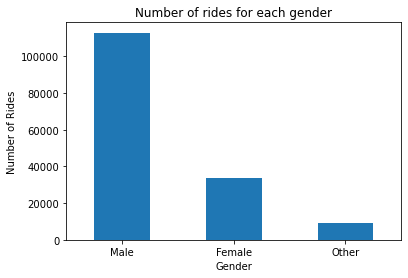

In [38]:
plot_bar('member_gender', 'Gender', 'Number of Rides', 'Number of rides for each gender', 0)

In [39]:
bike_df['member_gender'].value_counts(normalize=True)

Male      0.725036
Female    0.215686
Other     0.059278
Name: member_gender, dtype: float64

**Observation**

We have more male than female riders. 72% of the rides are by men. Anyway, we do not know if this has anything to do with the demography (gender ratio) of the population, or if most of the women prefer not to ride.

### Visualization 2: What part of the day are the most rides taken?

**Visualization**

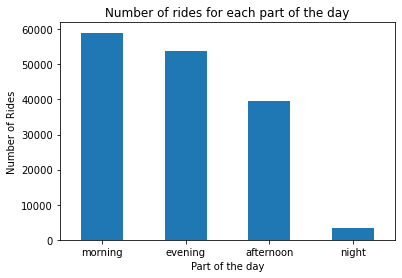

In [40]:
plot_bar('part_of_day', 'Part of the day', 'Number of Rides', 'Number of rides for each part of the day', 0)

In [41]:
bike_df['part_of_day'].value_counts(normalize=True)

morning      0.379051
evening      0.345375
afternoon    0.254283
night        0.021290
Name: part_of_day, dtype: float64

**Observation**

Most of the rides started in the morning. We have just 2% of the rides starting at night.

### Visualization 3: How much of the rides are from each user-type?

**Visualization**

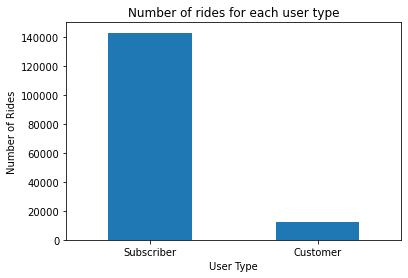

In [42]:
plot_bar('user_type', 'User Type', 'Number of Rides', 'Number of rides for each user type', 0)

In [43]:
bike_df['user_type'].value_counts(normalize=True)

Subscriber    0.918918
Customer      0.081082
Name: user_type, dtype: float64

**Observation**

92% of the rides are from subscribers while the rest are customers

### Visualization 4: What percentage of the rides are from users who use bike share for all their trips?

**Visualization**

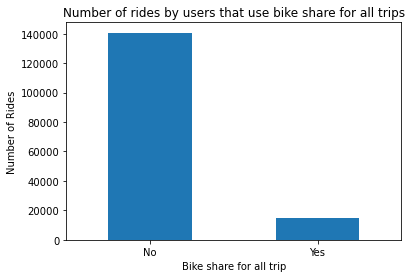

In [44]:
plot_bar('bike_share_for_all_trip', 'Bike share for all trip', 'Number of Rides', 'Number of rides by users that use bike share for all trips', 0)

In [45]:
bike_df['bike_share_for_all_trip'].value_counts(normalize=True)

No     0.903923
Yes    0.096077
Name: bike_share_for_all_trip, dtype: float64

**Observation**

90% of the rides are from subscribers

### Visualization 5: What percentage of the rides were taken at the different days of the week?

**Visualization**

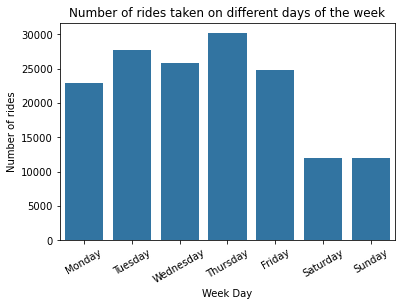

In [46]:
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
color = sb.color_palette()[0]
sb.countplot(data=bike_df, x='week_day', order=days, color=color)
plt.xticks(rotation=30)
plt.xlabel('Week Day')
plt.ylabel('Number of rides')
plt.title('Number of rides taken on different days of the week')
plt.show()

**Observation**

Most rides are taken between Monday and Friday and the least taken on Saturday and Sunday

### Visualization 6: Analysis of the top 10 busiest stations, using the start station column.

In [47]:
bike_df.start_station_name.value_counts(ascending=False).head(10)

Market St at 10th St                                         3602
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3232
Berry St at 4th St                                           2738
Montgomery St BART Station (Market St at 2nd St)             2484
San Francisco Caltrain (Townsend St at 4th St)               2417
Powell St BART Station (Market St at 4th St)                 2296
San Francisco Ferry Building (Harry Bridges Plaza)           2090
Howard St at Beale St                                        2045
Powell St BART Station (Market St at 5th St)                 1962
Steuart St at Market St                                      1930
Name: start_station_name, dtype: int64

In [48]:
busiest_stations = bike_df.start_station_name.value_counts(ascending=False).head(10).index
busiest_stations

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Powell St BART Station (Market St at 5th St)',
       'Steuart St at Market St'],
      dtype='object')

**Visualization**

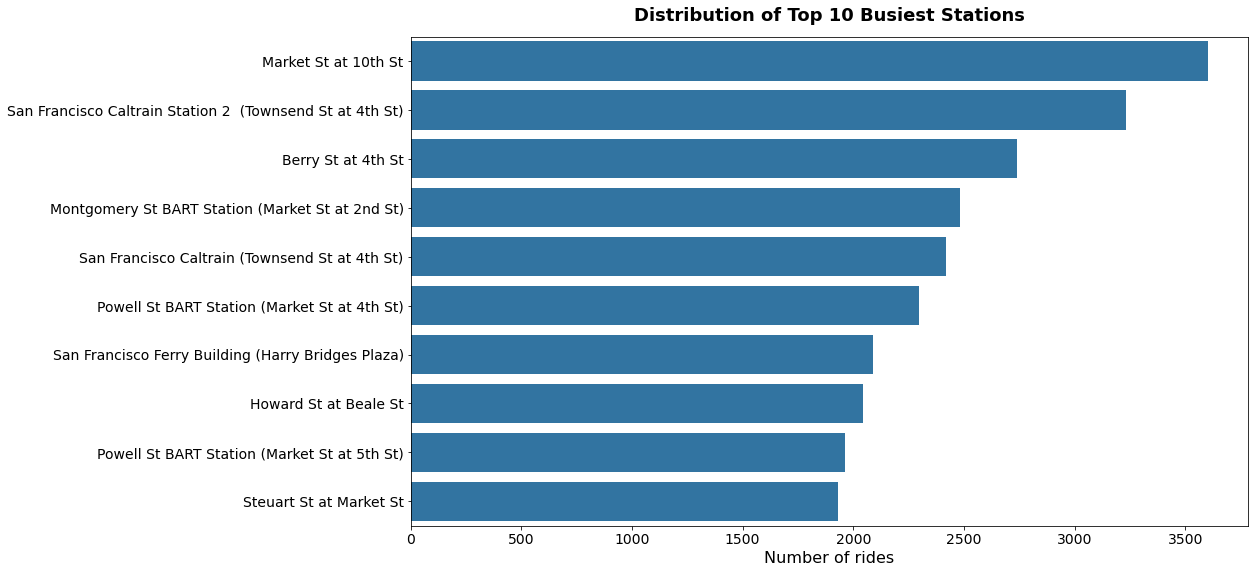

In [49]:
color = sb.color_palette()[0]
plt.figure(figsize=(15,9))
sb.countplot(data=bike_df, y='start_station_name', order=busiest_stations, orient = 'h', color=color)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of rides', fontsize=16)
plt.ylabel('')
plt.title('Distribution of Top 10 Busiest Stations', fontsize=18, y=1.02, weight="bold")
plt.show()

**Observation**

The buusiest station is the 'Market St at 10th St' station with 3602 rides starting from there.

### Summary of univariate exploration

From the univariate plots above, we can see that 72% of the riders are male, 92% are subscribers and 90% didn't use bike share for all their trips. There is a significant difference in the number of rides taken at night and those taken at other times of the day. This shows a real life scenario where most people are home or asleep at night. We also see that Mondays to Fridays are the busiest day, which also depicts a real life scenario.


Earlier in the data cleaning section, we noticed an unusual max value for duration, compared to other stats. We had to drop rows with duration above 1000 because of this.

## Bivariate Exploration <a name="bivariate"></a>

In [50]:
bike_df.head()

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,week_day,age,age_group,part_of_day
0,458,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,Female,Yes,Thursday,23,13-24,night
1,506,44,Civic Center/UN Plaza BART Station (Market St ...,343,Bryant St at 2nd St,5848,Subscriber,Male,No,Thursday,26,25-44,night
2,915,252,Channing Way at Shattuck Ave,244,Shattuck Ave at Hearst Ave,5101,Subscriber,Other,No,Thursday,35,25-44,night
3,395,243,Bancroft Way at College Ave,252,Channing Way at Shattuck Ave,4786,Subscriber,Male,No,Thursday,31,25-44,night
4,208,349,Howard St at Mary St,60,8th St at Ringold St,6361,Subscriber,Male,Yes,Thursday,26,25-44,night


### Visualization 7: Analysing ride duration accross the different parts of the day

**Visualization**

In [51]:
bike_df.groupby("part_of_day").duration_sec.mean()

part_of_day
afternoon    475.240469
evening      480.700130
morning      492.103030
night        423.765238
Name: duration_sec, dtype: float64

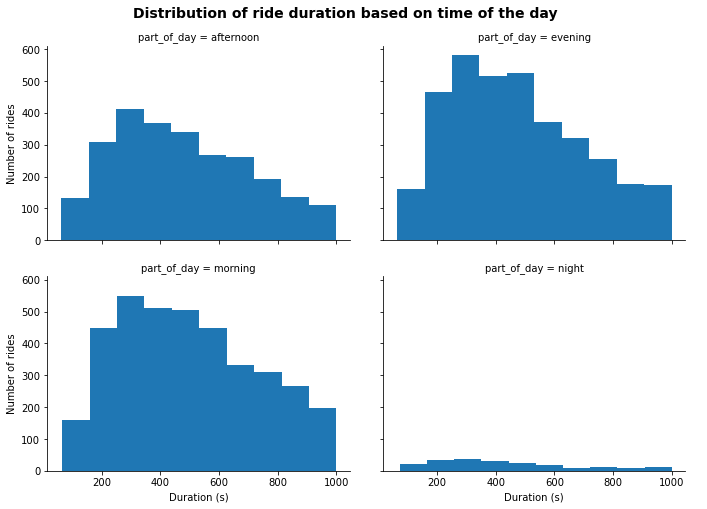

In [52]:
sample_data = bike_df.sample(10000)
g = sb.FacetGrid(data=sample_data, col="part_of_day", col_wrap=2)
g = g.map(plt.hist,"duration_sec")
g.add_legend()
g.set_xlabels('Duration (s)')
g.set_ylabels('Number of rides')
g.fig.set_size_inches(10,7)
g.fig.suptitle('Distribution of ride duration based on time of the day', y=1.02, fontsize=14, weight="bold")
plt.show()

**Observation**

Most people rode for between 200 to 600 seconds irrespective of the time of the day.

### Visualization 8: Distribution of User Types and Gender

**Visualization**

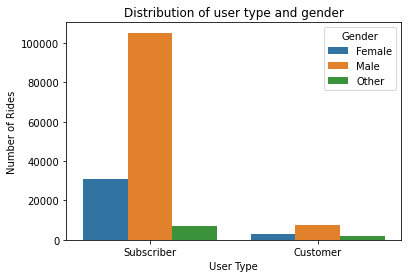

In [53]:
sb.countplot(data=bike_df, x='user_type', hue='member_gender')
plt.xlabel('User Type')
plt.ylabel('Number of Rides')
plt.legend(title='Gender')

plt.title('Distribution of user type and gender')
plt.show()

**Observation**
We've already seen that most of the rides are by subscribers and by the male gender. This visualization confirms that by showing the gender ratio of the subscribers.


### Visualization 9: What is correlation between user type and ride duration?

**Visualization**

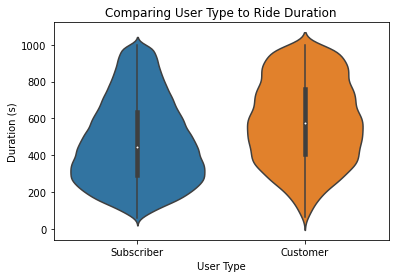

In [54]:
age_duration_plot = sb.violinplot(data=bike_df, x='user_type', y='duration_sec');
age_duration_plot.set(title = "Comparing User Type to Ride Duration")
plt.xlabel('User Type')
plt.ylabel('Duration (s)')
plt.show()

**Observation**
The violin plot above shows that the customers had longer trips on the average.

### Visualization 10: The distribution of ride durations for the top 10 busiest stations

**Visualization**

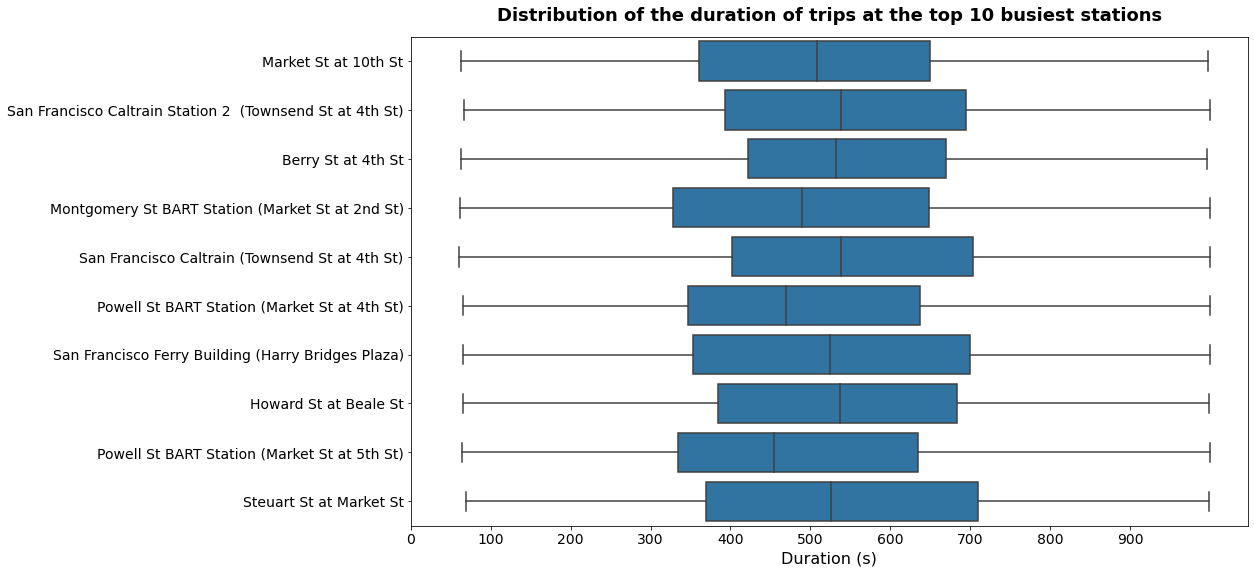

In [55]:
color = sb.color_palette()[0]
plt.figure(figsize=(15,9))
sb.boxplot(data=bike_df, x='duration_sec', y='start_station_name', order=busiest_stations, orient = 'h', color=color)
plt.xticks(ticks=np.arange(0, 1000, step=100), fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Duration (s)', fontsize=16)
plt.ylabel('')
plt.title('Distribution of the duration of trips at the top 10 busiest stations', fontsize=18, y=1.02, weight="bold")
plt.show()

**Observation**
The box plot above shows the duration of rides started at the top 10 busiest stations. It also shows that most of their rides take between 350 to 700 seconds.

### Visualization 11: Distribution of the gender of users who use Bike Share for all trips

**Visualization**

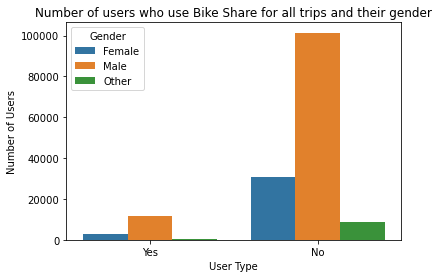

In [56]:
sb.countplot(data=bike_df, x='bike_share_for_all_trip', hue='member_gender')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.legend(title='Gender')
plt.title('Number of users who use Bike Share for all trips and their gender')
plt.show()

**Observation**
This visualization is in line with previous observations on gender ratio.

### Visualization 12: What is correlation between age and ride duration?

**Visualization**

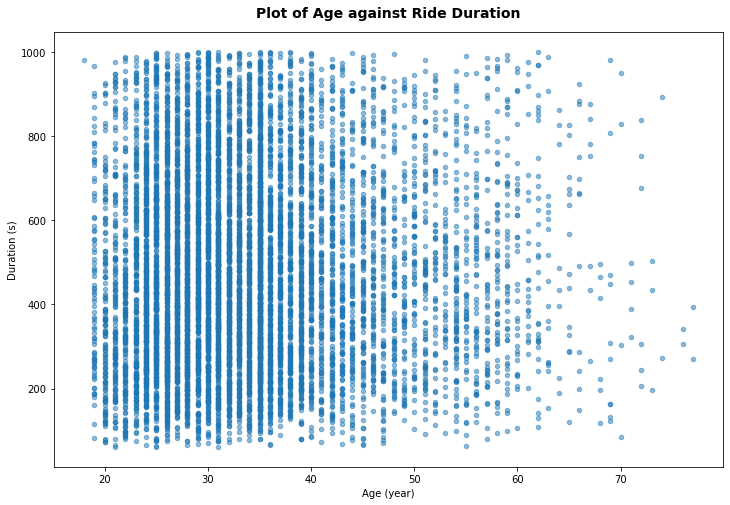

In [57]:
sample_data = bike_df.sample(10000)
plt.figure(figsize=(12,8));
plt.scatter( sample_data['age'], sample_data['duration_sec'], alpha=0.5, s=20);
plt.xlabel('Age (year)')
plt.ylabel('Duration (s)')
plt.title('Plot of Age against Ride Duration', y=1.02, fontsize=14, weight="bold")
plt.show()

**Observation**
From the visual above, there is no correlation between age and ride duration. But we can also see that more of the rides are by younger people than older people.


### Visualization 13: Distribution of ride duration by different age groups.

**Visualization**

In [58]:
df_groups = bike_df.groupby(['age_group']).duration_sec.mean()
df_groups

age_group
13-24    452.728020
25-44    487.320332
45-64    483.612142
65-84    479.352542
Name: duration_sec, dtype: float64

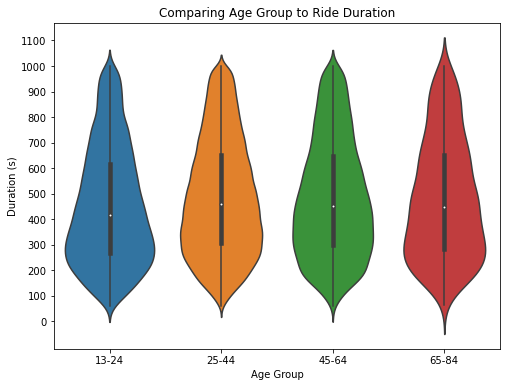

In [59]:
plt.figure(figsize=(8,6))
age_duration_plot = sb.violinplot(data=bike_df, x='age_group', y='duration_sec');
age_duration_plot.set(title = "Comparing Age Group to Ride Duration")
plt.yticks(ticks=np.arange(0, 1200, step=100))
plt.xlabel('Age Group')
plt.ylabel('Duration (s)')
plt.show()

**Observation**
The violin plot above shows similar features accross the age groups, with a mean ride duration between 450 and 500 seconds.

### Summary of bivariate exploration

The age and the time of the day do not affect the ride duration.

## Multivariate Exploration <a name="multivariate"></a>

### Visualization 14: What is the relationship between age, duration and gender?

**Visualization**

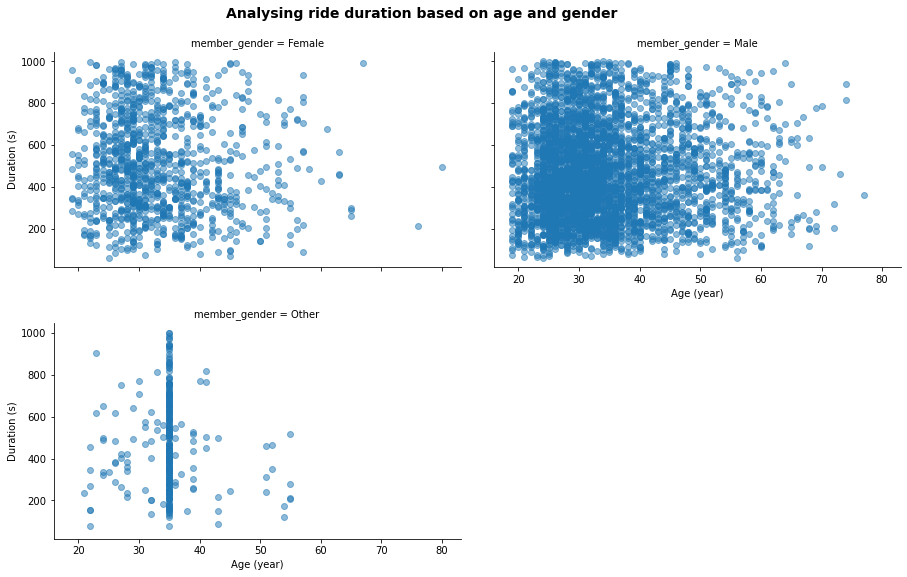

In [60]:
sample_data = bike_df.sample(5000)
g = sb.FacetGrid(data=sample_data, col="member_gender", col_wrap=2)
g = g.map(plt.scatter,"age","duration_sec", alpha=0.5)
g.set_ylabels('Duration (s)')
g.set_xlabels('Age (year)')
g.fig.set_size_inches(14,8)
g.fig.suptitle('Analysing ride duration based on age and gender', y=1.02, fontsize=14, weight="bold")
plt.show()

**Observation**

Age and gender have no relationship with trip duration. This plot also shows that most of the rides were by the male gender.

### Visualization 15: What is the relationship between age, duration, gender and part of the day?

**Visualization**

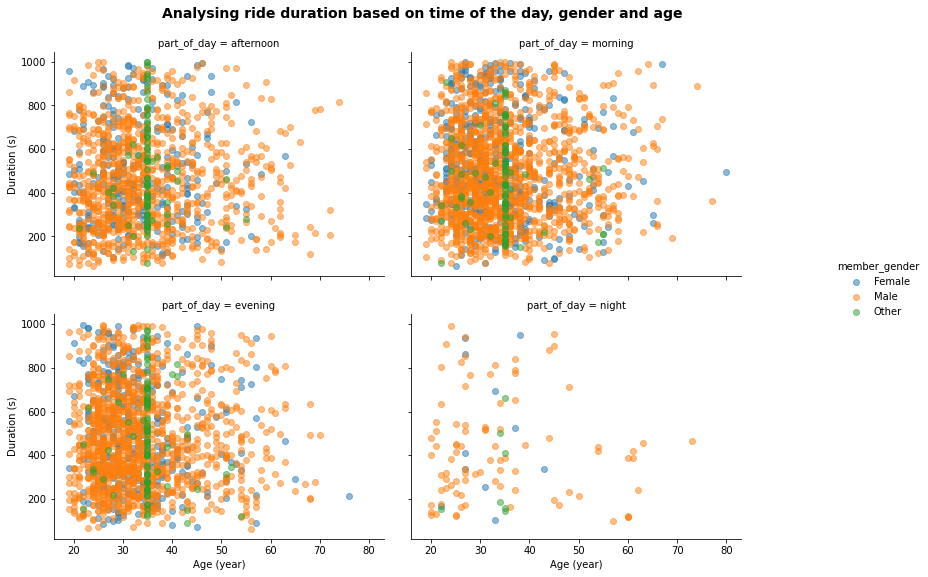

In [61]:
g = sb.FacetGrid(data=sample_data, col="part_of_day", hue="member_gender", col_wrap=2)
g = g.map(plt.scatter,"age","duration_sec", alpha=0.5)
g.add_legend()
g.set_ylabels('Duration (s)')
g.set_xlabels('Age (year)')
g.fig.set_size_inches(14,8)
g.fig.suptitle('Analysing ride duration based on time of the day, gender and age', y=1.02, fontsize=14, weight="bold")
plt.show()

**Observation**

The part of the day also doesn't show any difference in ride duration. We only have less rides at night.

## Conclusions <a name="conclusions"></a>

The following are the conclusions from the analysis above:

* Most of the rides lasted between 200 to 600 seconds.
* Most rides are by the male gender.
* We have more rides by younger people than older people.
* Most riders are subscribers.
* Saturdays and Sundays have the least number of rides.
* Of all the features we compared to ride duration, none of them affects the ride duration. This may be because the company has a duration range they allow for riders. It may also be that people generally have a limit to how long they can ride a bike before switching to other means of transportation. For instance, taking a bike from the office to the train station and completing the journey by train. We already observed that most riders do not use the bikes for all their trips.

In [62]:
# saving the dataframe
bike_df.to_csv('cleaned_tripdata.csv')